# Project: Investigate a Dataset: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The investigation here will be on "No Show Appointments" dataset. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import requests as req
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In this section, the data will be loaded for checking the cleanliness, and then trim and clean the dataset for analysis.

### Loading The Data:

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
# Get information on retrieved data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Visual Assesment:

Here is a random sample from the dataset to asses it:

In [4]:
# Get a sample from the dataset:
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
97443,6.542469e+13,5780548,F,2016-06-07T08:12:32Z,2016-06-07T00:00:00Z,43,SANTA CLARA,0,0,0,0,0,0,Yes
51636,9.737226e+14,5612601,F,2016-04-25T08:27:05Z,2016-05-10T00:00:00Z,30,CENTRO,0,0,0,0,0,1,Yes
18731,6.287411e+14,5718789,M,2016-05-19T10:07:39Z,2016-05-31T00:00:00Z,27,FORTE SÃO JOÃO,0,1,0,0,0,1,No
13976,4.514821e+13,5666691,M,2016-05-06T06:52:15Z,2016-05-06T00:00:00Z,1,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
72477,2.856916e+11,5650069,F,2016-05-03T07:26:36Z,2016-05-03T00:00:00Z,40,ANDORINHAS,1,0,0,0,0,0,No
99550,2.714990e+12,5760932,F,2016-06-01T15:58:45Z,2016-06-01T00:00:00Z,64,PRAIA DO SUÁ,0,1,0,0,0,0,No
19257,1.816778e+14,5646473,M,2016-05-02T11:23:24Z,2016-05-02T00:00:00Z,13,BELA VISTA,0,0,0,0,0,0,Yes
18396,4.396195e+14,5733551,F,2016-05-24T14:02:22Z,2016-05-24T00:00:00Z,10,MARIA ORTIZ,0,0,0,0,0,0,No
31383,5.576746e+13,5646128,F,2016-05-02T10:55:03Z,2016-05-05T00:00:00Z,33,ESTRELINHA,0,0,0,0,0,1,Yes
45762,5.775779e+12,5592332,F,2016-04-18T07:53:55Z,2016-05-04T00:00:00Z,49,PARQUE MOSCOSO,0,0,0,0,0,1,No


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.shape

(110527, 14)

### Progmatically Assesment:


In [7]:
# Check if there is any duplicated records
sum(df.duplicated())

0

In [8]:
# Check if age has non sense values 
df.query('Age <= 0  ' )

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [9]:
# Check if age has non sense values 
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

### Assesment Summery:

1. Clarify the data of the last column to be more obvious to set ‘No’ with showed up and ‘Yes’ if they did not show up.
2. The columns names need to be renamed due to its typo such as 'Hipertension' to 'Hypertension' and  'Handcap' to 'Handicap
3. Data type for ScheduledDay and AppointmentDay need to cast into datetime instead of object.
4. Data type of Patient ID need to cast to integer instead of float
5. Drop data which is not used and drop the duplicates ids during the wrangling as AppointmentID
6. There are non sense ages for the patient like -1  and 0 and cast it then to integer instead of float
7. Rename Neighborhood columns to be hospital_location to be convienent and No-show to be fit with the naming convesnsion.



# Data Cleaning:

At this stage, cleaning the data is performed as well based on the issues which were found in the previous section. The result should be a cleaned master pandas DataFrame.

In [10]:
# First Take a copy from the loaded data to keep the original as it is and work on a new copy:
data = df
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Step 1. Clarify the data of the last column to be more consistence as the rest of the data to set "0" means the patient shows up, "1" means the patient didn't show up): 

In [11]:
# Set "0" means the patient shows up, "1" means the patient didn't show up
data = data.replace({"No-show": {'No': '0', 'Yes': '1'}})

# Cast No-show to be integer 
data['No-show'] = data['No-show'].astype(int)

In [12]:
# Result:
data['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

### Step 2. The columns names need to be renamed due to its typo such as 'Hipertension' to 'Hypertension' and  'Handcap' to 'Handicap:

In [13]:
data.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


###  Step 3. Data type for ScheduledDay and AppointmentDay need to cast into datetime instead of object:

In [14]:
# Get current datatypes:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No-show             int64
dtype: object

In [15]:
# # Cast to datetime instead of string
data['AppointmentDay'] = pd.to_datetime(data.AppointmentDay)
data['ScheduledDay'] = pd.to_datetime(data.ScheduledDay)

In [16]:
# Result:
data.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                    int64
dtype: object

### Step 4. Data type of Patient ID need to cast to integer instead of float: 

In [17]:
# Cast patient id to be integer instead of float
data['PatientId'] = data['PatientId'].astype(int)


In [18]:
# Result: 
data.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                    int64
dtype: object

### Step 5. Drop data which is not used and drop the duplicates ids during the wrangling as AppointmentID:

In [19]:
#  Drop the usless column
data = data.drop('AppointmentID', 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [20]:
# Drop duplicated Patiend id if there is any:
data = data.drop_duplicates()
# Result: 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109909 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         109909 non-null int64
Gender            109909 non-null object
ScheduledDay      109909 non-null datetime64[ns]
AppointmentDay    109909 non-null datetime64[ns]
Age               109909 non-null int64
Neighbourhood     109909 non-null object
Scholarship       109909 non-null int64
Hypertension      109909 non-null int64
Diabetes          109909 non-null int64
Alcoholism        109909 non-null int64
Handicap          109909 non-null int64
SMS_received      109909 non-null int64
No-show           109909 non-null int64
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.7+ MB


### Step 6. There are non sense ages for the patient like -1  and 0 and cast it then to integer instead of float: 

In [21]:
# Set the mean of the age for the values with 0 or -1 
mean = data['Age'].mean()
data['Age'].replace({-1:mean,0:mean}, inplace=True)
data['Age'] = data['Age'].astype(int)

In [22]:
# result:
sum(data.query('Age <= 0' ).count())

0

### Step 7. Rename Neighborhood columns to be hospital_location to be convienent and No-show to be fit with the naming convesnsion:  

In [23]:
#Rename:
data.rename(columns = {'Neighbourhood':'Hospital_Location'}, inplace=True)

data.rename(columns = {'No-show':'No_show'}, inplace=True)
# Result: 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109909 entries, 0 to 110526
Data columns (total 13 columns):
PatientId            109909 non-null int64
Gender               109909 non-null object
ScheduledDay         109909 non-null datetime64[ns]
AppointmentDay       109909 non-null datetime64[ns]
Age                  109909 non-null int64
Hospital_Location    109909 non-null object
Scholarship          109909 non-null int64
Hypertension         109909 non-null int64
Diabetes             109909 non-null int64
Alcoholism           109909 non-null int64
Handicap             109909 non-null int64
SMS_received         109909 non-null int64
No_show              109909 non-null int64
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.7+ MB


In [24]:
# Now will display a sample from the cleaned data:
data.sample(20)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Hospital_Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
4137,63663654548738,M,2016-05-19 08:26:12,2016-05-19,18,MARIA ORTIZ,0,0,0,0,0,0,0
92269,17889375354682,M,2016-06-01 08:19:38,2016-06-01,37,CONSOLAÇÃO,0,1,1,0,0,0,0
77667,1268142279,F,2016-05-05 08:10:03,2016-05-05,31,ITARARÉ,0,0,0,0,0,0,0
67366,24313675297263,M,2016-03-07 12:51:37,2016-05-31,55,JARDIM CAMBURI,0,0,0,0,0,1,0
31563,88834999836575,M,2016-05-16 09:01:34,2016-05-19,48,GRANDE VITÓRIA,0,0,0,0,1,0,0
58140,689791941258776,F,2016-05-19 08:29:55,2016-05-19,36,JARDIM DA PENHA,0,0,0,0,0,0,0
26203,8528546262813,F,2016-05-20 14:57:12,2016-05-25,37,SANTA MARTHA,0,0,0,0,0,1,0
106816,79259537836118,F,2016-06-02 15:45:06,2016-06-08,81,MARIA ORTIZ,0,0,0,0,0,1,0
43938,522823613417469,F,2016-05-13 08:04:19,2016-05-13,32,GURIGICA,1,1,0,0,0,0,0
107101,16414951569179,F,2016-06-03 16:21:03,2016-06-07,50,MARUÍPE,0,0,1,0,0,1,1



## Exploratory Data Analysis


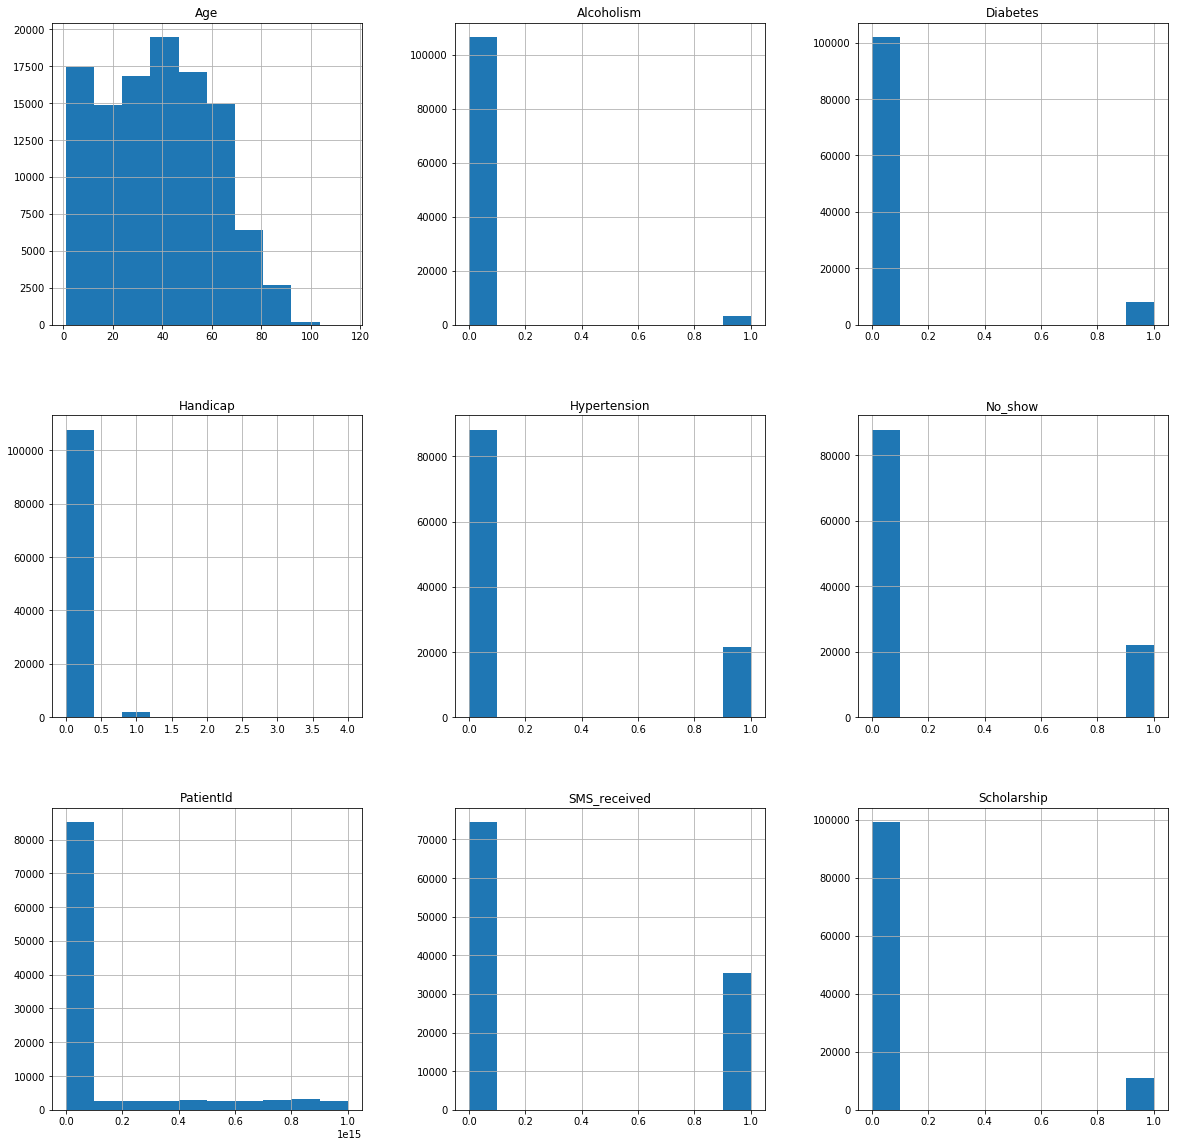

In [25]:
# Will show here quick graphs on the data to explore it:
data.hist(figsize=(20,20));

In [26]:
data.describe()

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,1.099090e+05,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000
mean,1.474577e+14,38.275164,0.098281,0.197236,0.071814,0.030425,0.022127,0.322831,0.201121
std,2.560490e+14,22.113398,0.297696,0.397914,0.258181,0.171755,0.160866,0.467561,0.400840
min,3.921700e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172982e+12,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Research Question 1:  Does it matter if the patients recieved a SMS to show up in their Appointments?

In [27]:
# Prepare the data to be explored:
data_SMS_received = data.query('SMS_received == 1')
data_showed_up = data.query('No_show == 0')
showed_up = data['No_show'] == 0
not_showed_up = data['No_show'] == 1
data['ShowedUp'] = showed_up
data['Not_ShowedUp'] = not_showed_up

Text(0,0.5,'Count')

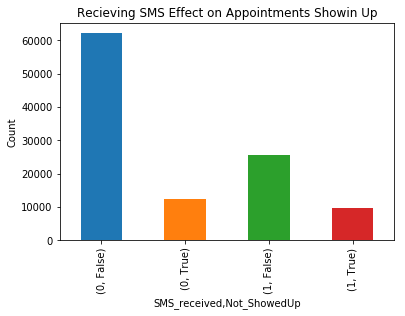

In [28]:
# Display the result:
data.groupby(['SMS_received'])['Not_ShowedUp'].value_counts().plot(kind='bar', title = 'Recieving SMS Effect on Appointments Showin Up')
plt.ylabel('Count')


##### Outcome:

* The Data showed that sending SMS messages to the patients is not a good factor to push on them to show up on their appointments. 

### Research Question 2: Is there a relation between Gender and people who showed up and who didn't?

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109909 entries, 0 to 110526
Data columns (total 15 columns):
PatientId            109909 non-null int64
Gender               109909 non-null object
ScheduledDay         109909 non-null datetime64[ns]
AppointmentDay       109909 non-null datetime64[ns]
Age                  109909 non-null int64
Hospital_Location    109909 non-null object
Scholarship          109909 non-null int64
Hypertension         109909 non-null int64
Diabetes             109909 non-null int64
Alcoholism           109909 non-null int64
Handicap             109909 non-null int64
SMS_received         109909 non-null int64
No_show              109909 non-null int64
ShowedUp             109909 non-null bool
Not_ShowedUp         109909 non-null bool
dtypes: bool(2), datetime64[ns](2), int64(9), object(2)
memory usage: 11.9+ MB


Gender
F    0.202425
M    0.198701
Name: Not_ShowedUp, dtype: float64


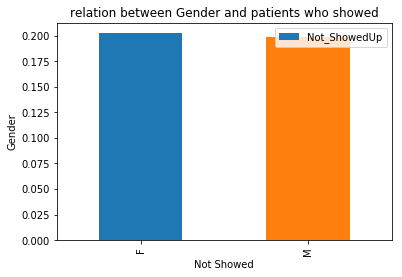

In [36]:
# using group by function to find relations between features and then see the relation between Gender and people who showed up and who didn't
print(data.groupby('Gender')['Not_ShowedUp'].mean())
data.groupby('Gender')['Not_ShowedUp'].mean().plot(kind='bar');
plt.xlabel("Not Showed")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who showed")
plt.legend();

#### Outcome: 

The data showed that a feature as the different gender is not a factor to decide if the person would come to his appointment or not as the data showed that the females and males have close resultd. 

### Research Question 3: At which day the patients can show up or not mostly?  

In [31]:
data['day']= data['AppointmentDay'].dt.weekday
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109909 entries, 0 to 110526
Data columns (total 16 columns):
PatientId            109909 non-null int64
Gender               109909 non-null object
ScheduledDay         109909 non-null datetime64[ns]
AppointmentDay       109909 non-null datetime64[ns]
Age                  109909 non-null int64
Hospital_Location    109909 non-null object
Scholarship          109909 non-null int64
Hypertension         109909 non-null int64
Diabetes             109909 non-null int64
Alcoholism           109909 non-null int64
Handicap             109909 non-null int64
SMS_received         109909 non-null int64
No_show              109909 non-null int64
ShowedUp             109909 non-null bool
Not_ShowedUp         109909 non-null bool
day                  109909 non-null int64
dtypes: bool(2), datetime64[ns](2), int64(10), object(2)
memory usage: 12.8+ MB


In [32]:
data.head(20)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Hospital_Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ShowedUp,Not_ShowedUp,day
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False,4
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False,4
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False,4
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False,4
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False,4
5,95985133231274,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,True,False,4
6,733688164476661,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,False,True,4
7,3449833394123,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,False,True,4
8,56394729949972,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,True,False,4
9,78124564369297,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,True,False,4


In [33]:
data['day']= data['AppointmentDay'].dt.weekday

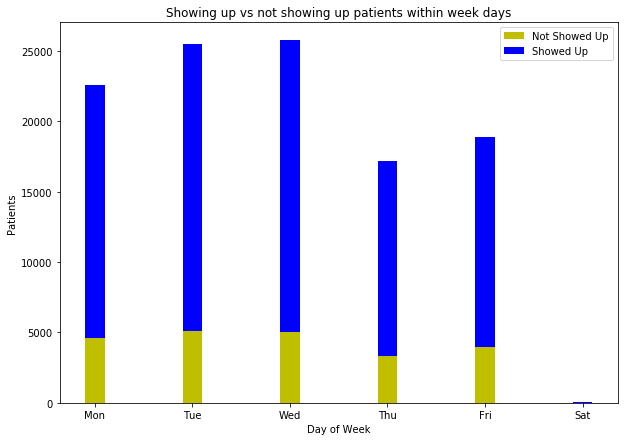

In [34]:
X = np.arange(len(data.day[not_showed_up].value_counts().sort_index()))
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
ax.bar(X, data.day[not_showed_up].value_counts().sort_index(), width=0.2, color='y', align='center')
ax.bar(X, data.day[showed_up].value_counts().sort_index(), width=0.2, bottom=data.day[not_showed_up].value_counts().sort_index(), color='b', align='center')
ax.legend(('Not Showed Up','Showed Up'))
plt.xticks(X, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
ax.set_title("Showing up vs not showing up patients within week days")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Patients")
plt.show()

#### Outcome:

The data showed that, Tuesday and Wendsday are more likely the paients may not showed up, and Saturday is the lowest day for patients appointments.

<a id='conclusions'></a>
## Conclusions

* The Data showed that sending SMS messages to the patients is not a good factor to push on them to show up on their appointments.
* The data showed that a feature as the different gender is not a factor to decide if the person would come to his appointment or not as the data showed that the females and males have close results. 
* The data showed that, Tuesday and Wendsday are more likely when the paients may not showed up, and Saturday is the lowest day for patients appointments.

# Limitation: 

* There are non sense values like at the age columns has values -1, 0, 125.
* Most of the values of the columns are boolean values. 


## Submitting your Project 

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0